In [2]:
import cv2
import matplotlib.pyplot as plt

# Morphological Operations

In [11]:
def create_hair_mask(image, lower_bound=(0, 0, 0), upper_bound=(180, 255, 40)):
    """
    Create a binary mask where hair regions are highlighted.

    Args:
    - image (np.ndarray): Input image (BGR format)
    - lower_bound (tuple): Lower bound of the HSV values for hair.
    - upper_bound (tuple): Upper bound of the HSV values for hair.

    Returns:
    - mask (np.ndarray): Binary mask highlighting hair regions.
    """
    # Convert the image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a binary mask where hair regions are highlighted based on HSV values
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Display the mask
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.title("Hair Mask")
    plt.axis('off')

    # Use morphological operations to refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    return mask


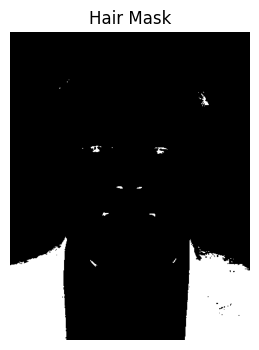

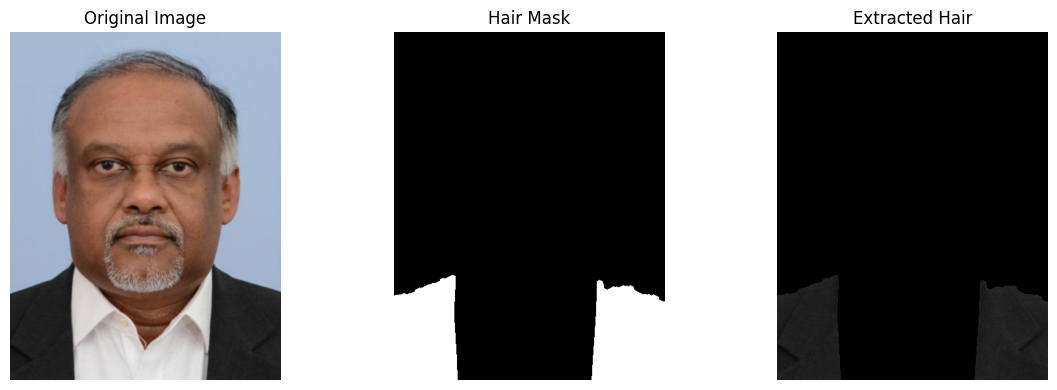

In [27]:
image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/dataset/valid/N230101710.JPG'
image = cv2.imread(image_path)

# Extract the hair mask
hair_mask = create_hair_mask(image)

# Use the mask to extract hair from the original image
hair_extracted = cv2.bitwise_and(image, image, mask=hair_mask)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hair_mask, cmap='gray')
plt.title("Hair Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(hair_extracted, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.title("Extracted Hair")
plt.axis('off')

plt.tight_layout()
plt.show()

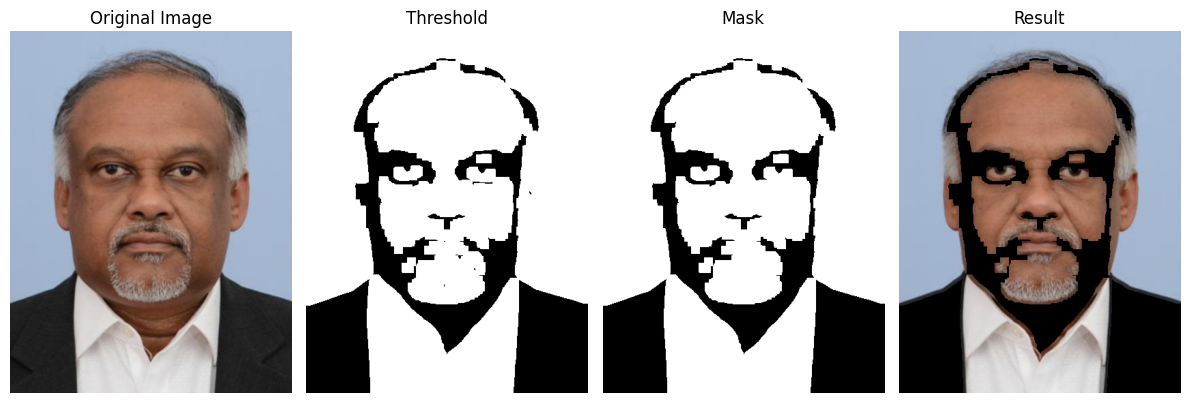

In [28]:
import cv2
import numpy as np

image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/dataset/valid/N230101710.JPG'

# Load the image
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the image
_, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Apply morphological transformations
kernel = np.ones((5,5), np.uint8)  # Adjust the size of the kernel for your needs
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)  # Opening to remove noise
threshold = cv2.dilate(threshold, kernel, iterations=2)  # Dilation to connect broken parts

# Find contours in the threshold image
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Create an empty mask to store the result
mask = np.zeros_like(img)

# Draw the contours on the mask with white color
cv2.drawContours(mask, contours, -1, (255,255,255), thickness=cv2.FILLED)

# Bitwise-and input image and mask to get result
result = cv2.bitwise_and(img, mask)


#plot original image, contours, mask, result
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.title("Threshold")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.title("Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
plt.title("Result")
plt.axis('off')

plt.tight_layout()
plt.show()




In [2]:
import numpy as np
from rembg import remove
from PIL import Image
import io
import matplotlib.pyplot as plt

def extract_hair_and_plot(image_path):
    # Load the image
    input_image = Image.open(image_path)

    # Use rembg to remove the background
    output = remove(np.array(input_image))

    # Convert the result from bytes to an image
    output_image = Image.open(io.BytesIO(output)).convert("RGBA")

    # Set everything except hair to transparent
    data = np.array(output_image)
    r, g, b, a = data[:,:,0], data[:,:,1], data[:,:,2], data[:,:,3]
    m = (r > 20) & (g > 20) & (b > 20) & (a > 0)
    data[:,:,:3][~m] = 0

    # Plot the output image using matplotlib
    plt.imshow(data)
    plt.title('Extracted Hair')
    plt.axis('off')  # Hide axes
    plt.show()


image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/dataset/valid/N230101710.JPG'

# Usage example:
extract_hair_and_plot(image_path)


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 309GB/s]


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1347cb920>

# K-Means clustering

In [48]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2
from sklearn.cluster import KMeans



In [49]:
PATH = "/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/detectors/eyes/hair_across_eyes/"

### Helper functions for extracting iris regions - Copied from other notebooks

In [50]:
def get_face_landmarks(image_path):
    model_path = os.path.join(PATH, "../../utilities/face_landmarker.task")
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.FaceLandmarkerOptions(
        base_options=base_options,
        output_face_blendshapes=True,
        output_facial_transformation_matrixes=True,
        num_faces=1,
    )
    detector = vision.FaceLandmarker.create_from_options(options)
    image = mp.Image.create_from_file(image_path)
    detection_result = detector.detect(image)
    face_landmarks_list = detection_result.face_landmarks
    face_landmarks = face_landmarks_list[0]
    return face_landmarks


In [51]:
LEFT_IRIS = list(set([index for pair in mp.solutions.face_mesh.FACEMESH_LEFT_IRIS for index in pair]))
RIGHT_IRIS = list(set([index for pair in mp.solutions.face_mesh.FACEMESH_RIGHT_IRIS for index in pair]))



def get_iris_coords(image_path, face_landmarks, mp_iris):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    x_coords = [int(face_landmarks[point].x * width) for point in mp_iris]
    y_coords = [int(face_landmarks[point].y * height) for point in mp_iris]
    mp_left, mp_right = min(x_coords), max(x_coords)
    mp_top, mp_bottom = min(y_coords), max(y_coords)

    return [(mp_left, mp_top), (mp_right, mp_top), (mp_right, mp_bottom), (mp_left, mp_bottom)]



def get_mp_iris_region(image_path, face_landmarks):
    return get_iris_coords(image_path, face_landmarks, LEFT_IRIS), \
        get_iris_coords(image_path, face_landmarks, RIGHT_IRIS)

## KMeans - Algorithm for clustering

ValueError: num must be an integer with 1 <= num <= 6, not 7

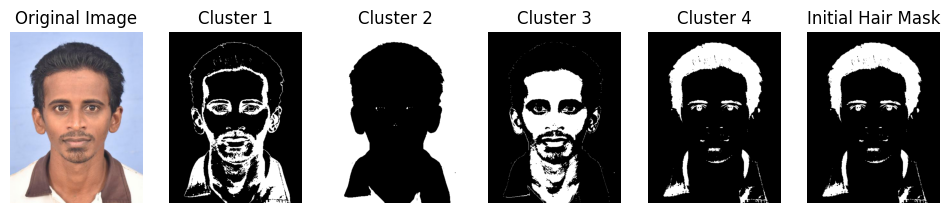

In [45]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def extract_hair_using_kmeans(image_path, output_path=None):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 6, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')

    # Flatten the image
    pixels = image.reshape((-1, 3))

    # Use KMeans to cluster the pixel colors into four clusters
    kmeans = KMeans(n_clusters=4, n_init=40, max_iter=500).fit(pixels)

    # Create a mask for each cluster
    masks = [(kmeans.labels_ == i).reshape(image.shape[:2]) for i in range(4)]

    # Removing duplicate clusters based on pixel count
    pixel_counts = [np.sum(mask) for mask in masks]
    unique_masks = [mask for i, mask in enumerate(masks) if pixel_counts.count(np.sum(mask)) == 1]

    # Plot unique clusters
    for i, mask in enumerate(unique_masks, 2):
        plt.subplot(1, 6, i)
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
        plt.title(f'Cluster {i-1}')

    # Calculate the mean vertical position for each unique mask to identify the topmost mask
    mean_vertical_positions = [np.mean(np.nonzero(mask)[0]) for mask in unique_masks]
    hair_cluster = np.argmin(mean_vertical_positions)

    # Use the topmost mask as the initial hair mask
    hair_mask = unique_masks[hair_cluster].astype(np.uint8) * 255
    plt.subplot(1, 6, 6)
    plt.imshow(hair_mask, cmap='gray')
    plt.axis('off')
    plt.title('Initial Hair Mask')

    # Refinement: Remove small areas (like eyes, mouth) from the mask using morphological operations
    kernel = np.ones((15, 15), np.uint8)
    refined_mask = cv2.morphologyEx(hair_mask, cv2.MORPH_OPEN, kernel)
    plt.subplot(1, 6, 7)
    plt.imshow(refined_mask, cmap='gray')
    plt.axis('off')
    plt.title('Refined Hair Mask')

    plt.tight_layout()
    plt.show()

    if output_path:
        cv2.imwrite(output_path, refined_mask)

    return refined_mask


image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/dataset/valid/N230201459.JPG'

# Example usage
extract_hair_using_kmeans(image_path)


## KMeans - Algorithm for hair extraction

In [74]:
def extract_hair_using_kmeans(image_path, output_path=None):
    # Load the image
    # image = cv2.imread(image_path)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 6, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')

    # Flatten the image
    pixels = image.reshape((-1, 3))

    # Use KMeans to cluster the pixel colors into four clusters
    kmeans = KMeans(n_clusters=4, n_init=40, max_iter=500).fit(pixels)

    # Create a mask for each cluster
    masks = [(kmeans.labels_ == i).reshape(image.shape[:2]) for i in range(4)]

    # Compute mean color for each cluster and identify the darkest
    mean_colors = [np.mean(image[mask]) for mask in masks]
    darkest_cluster_index = np.argmin(mean_colors)
    darkest_mask = masks[darkest_cluster_index]

    # Find the largest contiguous region in the darkest mask
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(darkest_mask.astype(np.uint8), connectivity=8)
    largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1  # exclude background
    hair_mask = np.where(labels == largest_label, 255, 0).astype(np.uint8)

    # Plotting the clusters and hair mask
    for i, mask in enumerate(masks, 2):
        plt.subplot(1, 6, i)
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
        plt.title(f'Cluster {i-1}')
    plt.subplot(1, 6, 6)
    plt.imshow(hair_mask, cmap='gray')
    plt.axis('off')
    plt.title('Hair Mask')

    plt.tight_layout()
    plt.show()

    if output_path:
        cv2.imwrite(output_path, hair_mask)

    return hair_mask


In [150]:
# image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/dataset/valid/N230101837.JPG'
# image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/dataset/valid/N230101710.JPG'
# image_path = '/Users/raminduwalgama/Downloads/WhatsApp Image 2023-08-16 at 14.34.28.jpeg'
image_path = '/Users/raminduwalgama/Downloads/20230817_151541.jpg'
# image_path = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/detectors/images/ef3478e0-17a2-4907-a6a8-b01c855c0428.jpeg'


W20231031 01:09:37.725347 1535627 face_landmarker_graph.cc:168] Face blendshape model contains CPU only ops. Sets FaceBlendshapesGraph acceleration to Xnnpack.


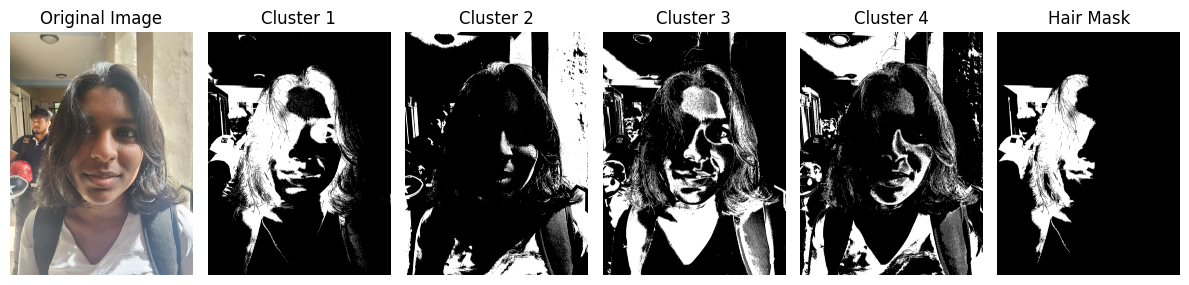

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [153]:
# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_landmarks = get_face_landmarks(image_path)

left_iris, right_iris = get_mp_iris_region(image_path, face_landmarks)
bottom = max(left_iris[2][1], right_iris[2][1]) + 10

# Crop the image to the region of interest
# image = image[:bottom, :, :]

# Example usage
extract_hair_using_kmeans(image)


# Color thresholding

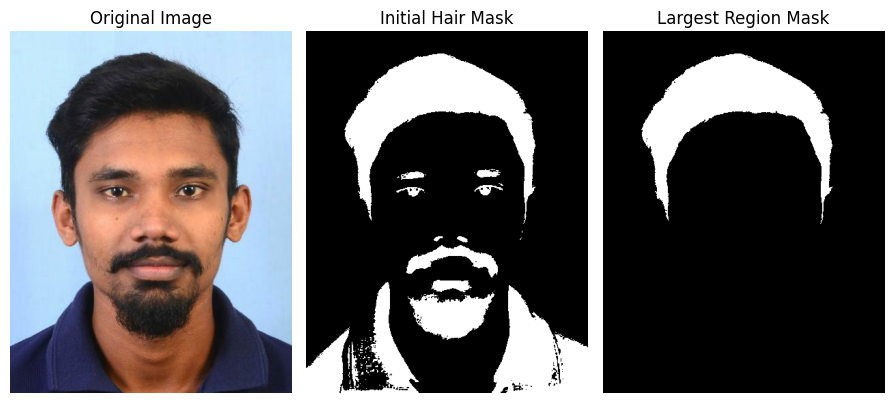

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_hair_by_color(image_path, output_path=None):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for hair color in HSV space
    # This is just an example for dark hair; you'd adjust these values based on the desired hair color
    lower_bound = np.array([0, 0, 0])
    upper_bound = np.array([180, 255, 80])

    # Create a mask using color thresholding
    mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

    # Extract the largest contiguous region
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1  # exclude background
    largest_region_mask = np.where(labels == largest_label, 255, 0).astype(np.uint8)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.title('Initial Hair Mask')

    plt.subplot(1, 4, 3)
    plt.imshow(largest_region_mask, cmap='gray')
    plt.axis('off')
    plt.title('Largest Region Mask')

    plt.tight_layout()
    plt.show()

    return largest_region_mask


# Example usage
hair = extract_hair_by_color(image_path)


In [148]:
def corners_to_mask(shape, corners):
    """
    Convert corner coordinates into a binary mask.
    :param shape: Shape of the output mask.
    :param corners: List of corner coordinates.
    :return: Binary mask.
    """
    mask = np.zeros(shape, dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.array(corners, dtype=np.int32), 255)
    return mask


# Check eyes covering hair

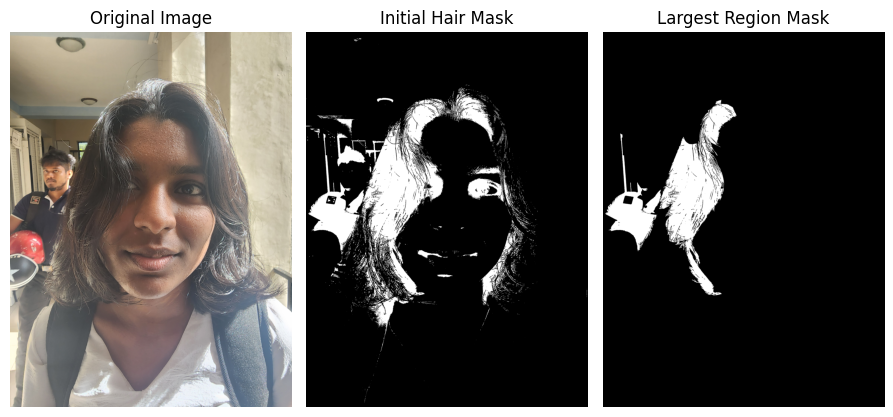

Left iris overlaps with hair: False
Right iris overlaps with hair: True


In [152]:
def check_overlap(image_path, face_landmarks):
    # Extract hair using the earlier function
    hair_mask = extract_hair_by_color(image_path)

    # Get iris regions
    left_iris, right_iris = get_mp_iris_region(image_path, face_landmarks)

    # Convert the iris regions into binary masks
    h, w = hair_mask.shape
    left_iris_mask = corners_to_mask((h, w), left_iris)
    right_iris_mask = corners_to_mask((h, w), right_iris)

    # Check overlap between iris masks and hair mask
    left_overlap = np.any(np.logical_and(hair_mask, left_iris_mask))
    right_overlap = np.any(np.logical_and(hair_mask, right_iris_mask))

    return left_overlap, right_overlap

# Example usage
left_overlap, right_overlap = check_overlap(image_path, face_landmarks)
print(f"Left iris overlaps with hair: {left_overlap}")
print(f"Right iris overlaps with hair: {right_overlap}")
